<a href="https://colab.research.google.com/github/jalaluddin5/machine_learning/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [108]:
dataset=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
dataset.head()
dataset=dataset.drop(columns=['id'])

In [109]:
dataset.bmi=dataset.bmi.fillna(dataset.bmi.mean())

In [110]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,4,5,6,9])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [113]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [114]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=42)

In [115]:
y_proba = model.predict_proba(x_test)[:, 1]  # class-1 probability
fixed_thresh = 0.36
y_pred = (y_proba > fixed_thresh).astype(int)

In [116]:
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nFixed Threshold = {fixed_thresh}")
print(f"Accuracy = {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Fixed Threshold = 0.36
Accuracy = 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.16      0.82      0.27        62

    accuracy                           0.72      1022
   macro avg       0.57      0.77      0.55      1022
weighted avg       0.93      0.72      0.80      1022

Confusion Matrix:
 [[689 271]
 [ 11  51]]


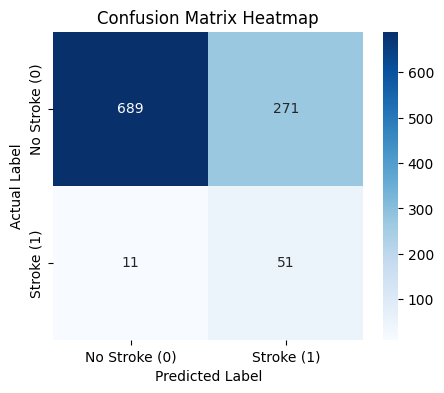

In [117]:
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()